In [1]:
import pandas as pd

# Loading data

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#age #cabin #embark

# Fill missing values in the 'Age','Cabin','Embarked' column with the median

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df['Ticket_Split'] = df['Ticket'].apply(lambda x: x.split()[1] if ' ' in x else x)

In [10]:
df['Age'] = df['Age'].round().astype(int)

In [11]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Split
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unknown,S,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Unknown,S,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,113803
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Unknown,S,373450
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,Unknown,Q,330877
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,17463
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,Unknown,S,349909
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,Unknown,S,347742
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,Unknown,C,237736


In [12]:
df['Ticket_Split']

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket_Split, Length: 891, dtype: object

In [13]:
df.drop(columns=['Ticket'], inplace=True)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_Split
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,Unknown,S,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,Unknown,S,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S,113803
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,Unknown,S,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,Unknown,S,211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,B42,S,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,23.4500,Unknown,S,6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C148,C,111369


# Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

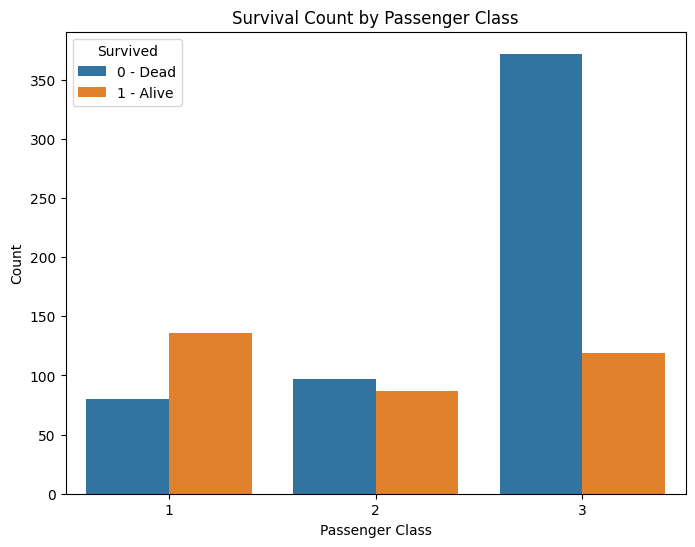

In [16]:
#creating a bar of Pclass vs Survived
plt.figure(figsize = (8,6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['0 - Dead', '1 - Alive'])
plt.show()

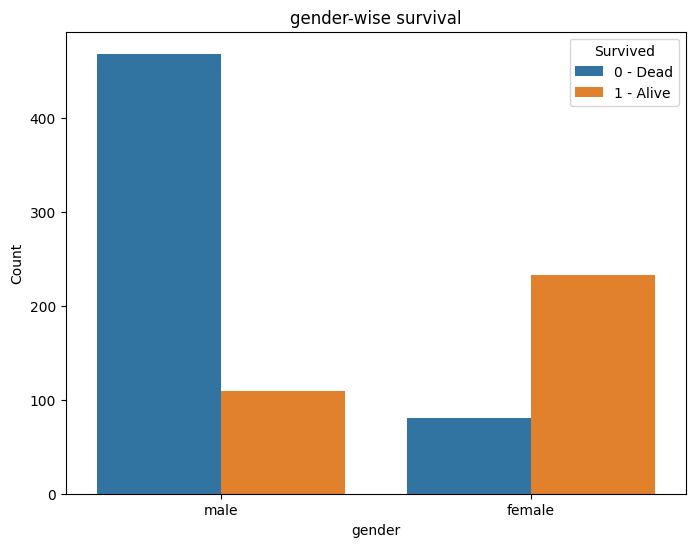

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xlabel('gender')
plt.title('gender-wise survival')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['0 - Dead', '1 - Alive'])
plt.show()

In [18]:
df['Age'].min()

np.int64(0)

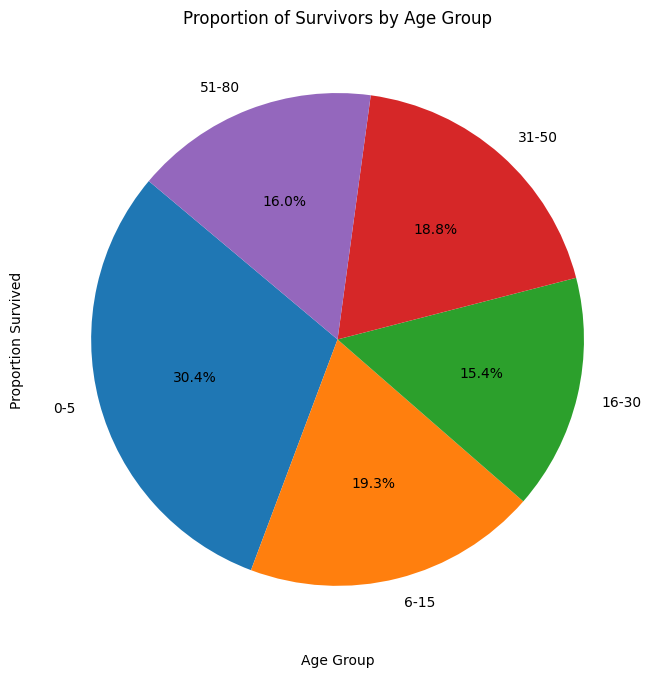

In [19]:
# Define age bins and labels
bins = [0, 5, 12, 30, 50, 80]
labels = ['0-5', '6-15', '16-30', '31-50', '51-80']
df['age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the proportion of survivors in each age bin
age_bin_survival = df.groupby('age_bin', observed=False)['Survived'].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 8))
plt.pie(age_bin_survival['Survived'], labels=age_bin_survival['age_bin'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion Survived')
plt.grid(True)
plt.show()

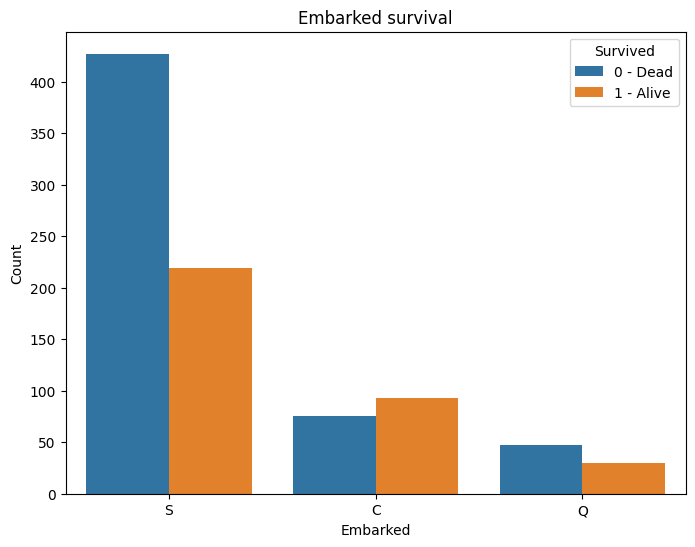

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.xlabel('Embarked')
plt.title('Embarked survival')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['0 - Dead', '1 - Alive'])
plt.show()

In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

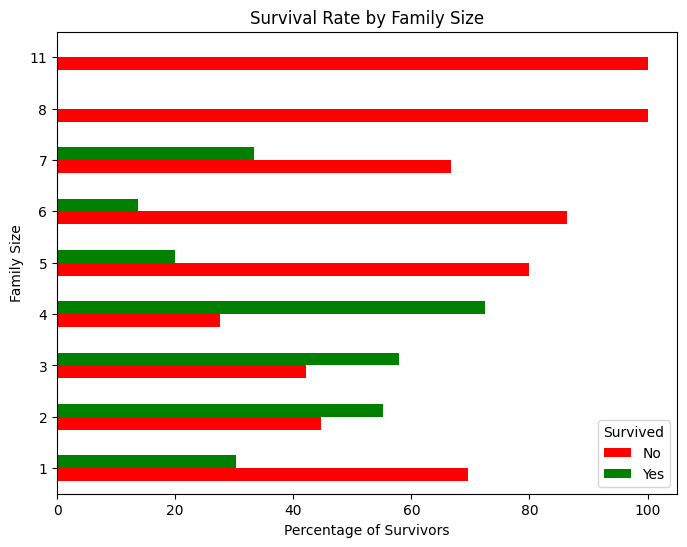

In [22]:
# Calculate the proportion of survivors by Family Size
survival_counts = df.groupby(['FamilySize', 'Survived']).size().unstack(fill_value=0)

# Calculate the percentage of survivors
survival_percentage = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100

# Plotting the horizontal bar plot
plt.figure(figsize=(8, 6))
survival_percentage.plot(kind='barh', ax=plt.gca(), color=['red', 'green'])
plt.title('Survival Rate by Family Size')
plt.xlabel('Percentage of Survivors')
plt.ylabel('Family Size')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()